In [1]:
# --- Célula 1: Importações (Versão Corrigida) ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa as ferramentas de modelagem do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Carregar a tabela de features final, resultado de todo o nosso trabalho de EDA
path_final_table = '../data/processed/feature_table_final.parquet'
df = pd.read_parquet(path_final_table)

print("Tabela de features final carregada.")
print(f"A tabela contém {df.shape[0]} dias e {df.shape[1]} colunas.")
display(df.head())
df.info()

Tabela de features final carregada.
A tabela contém 349 dias e 13 colunas.


,deficit_diario_mwh,nivel_risco,programada,verificada,diferenca_verif_prog,geracao_total_diaria_go,geracao_fotovoltaica_diaria,geracao_hidroelétrica_diaria,geracao_térmica_diaria,total_mwh_restrito_go,saldo_intercambio_seco,ear_percentual_seco,ena_percentual_mlt_seco
timestamp,,,,,,,,,,,,,
2024-01-04,11.883333,baixo,94325.1556,94435.7699,110.6143,63505.777,3129.661,59827.147,548.969,0.0,0.0,60.705200,50.019100
2024-01-05,0.000000,baixo,93930.0816,98971.5821,5041.5005,67997.534,3507.743,64190.064,299.727,0.0,0.0,60.846500,54.623901
2024-01-06,0.000000,baixo,90861.8033,94057.2059,3195.4026,60757.742,4506.600,55983.076,268.066,0.0,0.0,61.037399,57.613098
2024-01-07,0.000000,baixo,86224.1119,87675.0444,1450.9325,57482.267,4923.782,52289.827,268.658,0.0,0.0,61.125401,56.903099
2024-01-08,2.533333,baixo,95592.4950,95044.4144,-548.0806,74487.465,4525.640,69691.539,270.286,0.0,0.0,60.937801,55.430302


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349 entries, 2024-01-04 to 2024-12-17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   deficit_diario_mwh            349 non-null    float64
 1   nivel_risco                   349 non-null    object 
 2   programada                    349 non-null    float64
 3   verificada                    349 non-null    float64
 4   diferenca_verif_prog          349 non-null    float64
 5   geracao_total_diaria_go       349 non-null    float64
 6   geracao_fotovoltaica_diaria   349 non-null    float64
 7   geracao_hidroelétrica_diaria  349 non-null    float64
 8   geracao_térmica_diaria        349 non-null    float64
 9   total_mwh_restrito_go         349 non-null    float64
 10  saldo_intercambio_seco        349 non-null    float64
 11  ear_percentual_seco           349 non-null    float64
 12  ena_percentual_mlt_seco       349 non-null   

In [3]:
# A coluna 'nivel_risco' é nosso alvo (o que queremos prever).
y = df['nivel_risco']

# As features (X) são todas as outras colunas numéricas.
# Removemos a coluna alvo e também a coluna de déficit original, pois ela foi usada para criar o alvo.
X = df.drop(columns=['nivel_risco', 'deficit_diario_mwh'])

print("Dados separados em Features (X) e Alvo (y):")
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

Dados separados em Features (X) e Alvo (y):
Formato de X: (349, 11)
Formato de y: (349,)


In [4]:
# --- Célula 4: Pré-processamento - Codificação do Alvo e Divisão Treino/Teste (VERSÃO PRAGMÁTICA) ---

# Verificação da contagem de classes
print("--- Contagem de dias por classe de risco (Dados de 2024) ---")
print(y.value_counts())

# Mapeamento para 3 classes, como no plano original
mapeamento_risco = {'baixo': 0, 'medio': 1, 'alto': 2}
y_encoded = y.map(mapeamento_risco)

# --- CORREÇÃO: Removemos o 'stratify' ---
# Devido à raridade extrema das classes 'medio' e 'alto' (apenas 1 membro cada),
# a estratificação é impossível. Removemos o parâmetro para permitir que o código execute.
# CONSEQUÊNCIA: Os exemplos raros provavelmente ficarão apenas no conjunto de treino,
# e não poderemos avaliar a performance do modelo para essas classes no conjunto de teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.3, 
    random_state=42
    # stratify=y_encoded <-- REMOVIDO
)

print("\nDados divididos em conjuntos de treino e teste.")
print("Tamanho do treino:", X_train.shape[0])
print("Tamanho do teste:", X_test.shape[0])

print("\nDistribuição do risco no conjunto de TREINO:")
print(y_train.value_counts())

print("\nDistribuição do risco no conjunto de TESTE:")
print(y_test.value_counts())

--- Contagem de dias por classe de risco (Dados de 2024) ---
nivel_risco
baixo    347
medio      1
alto       1
Name: count, dtype: int64

Dados divididos em conjuntos de treino e teste.
Tamanho do treino: 244
Tamanho do teste: 105

Distribuição do risco no conjunto de TREINO:
nivel_risco
0    243
2      1
Name: count, dtype: int64

Distribuição do risco no conjunto de TESTE:
nivel_risco
0    104
1      1
Name: count, dtype: int64


In [5]:
# --- Célula 5: Pré-processamento - Escalonamento das Features ---

# Modelos como a Regressão Logística funcionam melhor quando as features estão na mesma escala.
# O StandardScaler ajusta os dados para que tenham média 0 e desvio padrão 1.
scaler = StandardScaler()

# Ajustamos o scaler APENAS com os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Aplicamos a mesma transformação nos dados de teste
X_test_scaled = scaler.transform(X_test)

print("Features escalonadas com sucesso.")

Features escalonadas com sucesso.


In [6]:
# --- Célula 6: Treinamento do Modelo Base (Regressão Logística) ---

# 'class_weight='balanced'' continua sendo muito importante para dizer ao modelo
# para dar mais atenção às classes raras ('medio', 'alto').
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Treinar o modelo usando os dados de treino escalonados
print("Treinando o modelo de Regressão Logística...")
model.fit(X_train_scaled, y_train)
print("Treinamento concluído.")

Treinando o modelo de Regressão Logística...
Treinamento concluído.


In [7]:
# --- Célula 7: Previsões e Avaliação Numérica ---

# Usar o modelo treinado para fazer previsões no conjunto de teste
print("Fazendo previsões no conjunto de teste...")
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do Modelo: {accuracy:.2%}\n")

# O Relatório de Classificação agora mostrará a performance para as 3 classes.
# O mais importante é observar o 'recall' das classes 'medio' and 'alto'.
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=mapeamento_risco.keys()))

Fazendo previsões no conjunto de teste...

Acurácia do Modelo: 98.10%

Relatório de Classificação:
              precision    recall  f1-score   support

       baixo       0.99      0.99      0.99       104
       medio       0.00      0.00      0.00         1
        alto       0.00      0.00      0.00         0

    accuracy                           0.98       105
   macro avg       0.33      0.33      0.33       105
weighted avg       0.98      0.98      0.98       105



/home/paulo/Code/ons-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/paulo/Code/ons-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/paulo/Code/ons-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

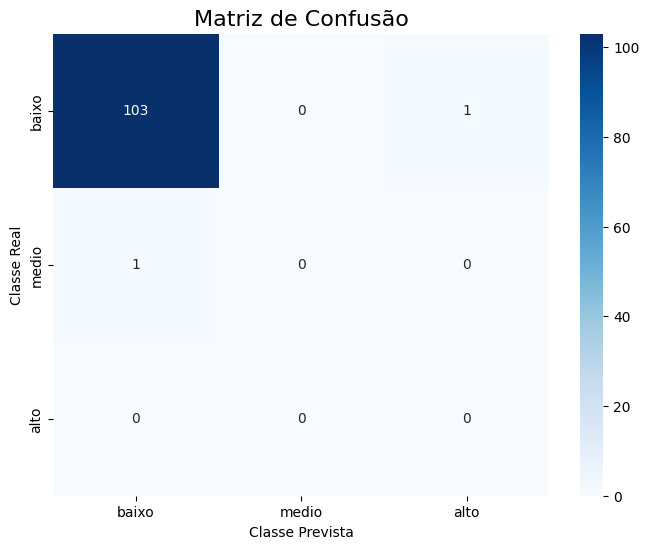

In [8]:
# --- Célula 8: Avaliação Visual - Matriz de Confusão ---

# A Matriz de Confusão nos mostrará os acertos e erros para as 3 classes.
cm = confusion_matrix(y_test, y_pred)
class_names = mapeamento_risco.keys()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()